## 🧠 1. Setup: Imports

In [2]:
# Core libraries
import pandas as pd
import numpy as np

In [3]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go


In [4]:
!pip install prophet

Defaulting to user installation because normal site-packages is not writeable


In [5]:
# Models
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet

In [6]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [7]:
# LSTM
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [8]:
# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error

## 📁 2. Load and Preprocess Data

In [10]:
# Load data
df = pd.read_csv("AAPL.csv")  # Replace with your file
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-16,51.070000,51.790001,50.959999,51.625000,49.954624,110481600
1,2019-08-19,52.654999,53.182499,52.507500,52.587502,50.885971,97654400
2,2019-08-20,52.720001,53.337502,52.580002,52.590000,50.888390,107537200
3,2019-08-21,53.247501,53.412498,52.900002,53.160000,51.439960,86141600
4,2019-08-22,53.297501,53.610001,52.687500,53.115002,51.396420,89014800
...,...,...,...,...,...,...,...
1253,2024-08-09,212.100006,216.779999,211.970001,216.240005,215.990005,42201600
1254,2024-08-12,216.070007,219.509995,215.600006,217.529999,217.529999,38028100
1255,2024-08-13,219.009995,221.889999,219.009995,221.270004,221.270004,44155300
1256,2024-08-14,220.570007,223.029999,219.699997,221.720001,221.720001,41960600


In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0      2019-08-16
1      2019-08-19
2      2019-08-20
3      2019-08-21
4      2019-08-22
          ...    
1253   2024-08-09
1254   2024-08-12
1255   2024-08-13
1256   2024-08-14
1257   2024-08-15
Name: Date, Length: 1258, dtype: datetime64[ns]

In [13]:
df.set_index('Date', inplace=True)

In [15]:
df = df[['Close']]  # Focus on 'Close' price
df

,Close
Date,
2019-08-16,51.625000
2019-08-19,52.587502
2019-08-20,52.590000
2019-08-21,53.160000
2019-08-22,53.115002
...,...
2024-08-09,216.240005
2024-08-12,217.529999
2024-08-13,221.270004


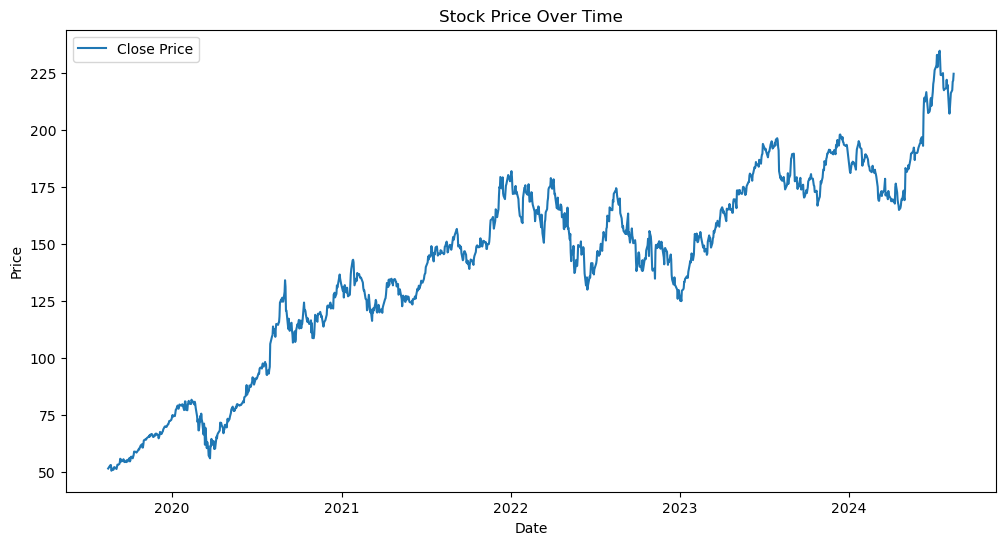

In [16]:
# Visualization
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price')
plt.title("Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

## 📊 3. ARIMA Forecasting

In [18]:
# Set daily frequency
df = df.asfreq('D')

In [21]:
model_arima = ARIMA(df['Close'], order=(5,1,0))
model_arima

In [23]:
result_arima = model_arima.fit()
result_arima

In [24]:
forecast_arima = result_arima.forecast(steps=30)
forecast_arima

2024-08-16    224.501633
2024-08-17    224.226831
2024-08-18    224.291710
2024-08-19    224.268457
2024-08-20    224.186370
2024-08-21    224.206306
2024-08-22    224.216852
2024-08-23    224.209674
2024-08-24    224.211339
2024-08-25    224.213973
2024-08-26    224.212749
2024-08-27    224.212502
2024-08-28    224.212888
2024-08-29    224.212768
2024-08-30    224.212684
2024-08-31    224.212748
2024-09-01    224.212748
2024-09-02    224.212731
2024-09-03    224.212738
2024-09-04    224.212741
2024-09-05    224.212738
2024-09-06    224.212738
2024-09-07    224.212739
2024-09-08    224.212738
2024-09-09    224.212738
2024-09-10    224.212738
2024-09-11    224.212738
2024-09-12    224.212738
2024-09-13    224.212738
2024-09-14    224.212738
Freq: D, Name: predicted_mean, dtype: float64

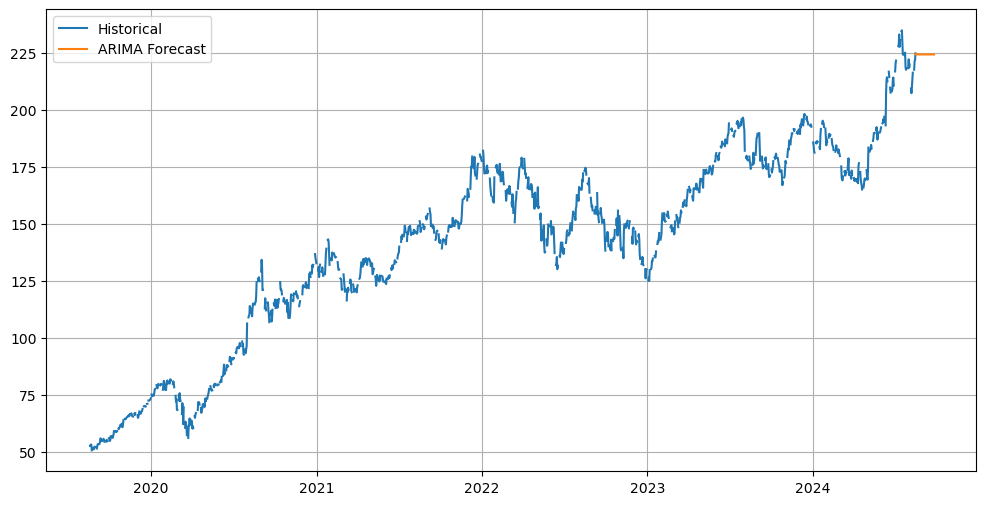

In [25]:
# Plot
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Historical')
plt.plot(pd.date_range(df.index[-1], periods=30, freq='B'), forecast_arima, label='ARIMA Forecast')
plt.legend()
plt.grid(True)
plt.show()

## 🌀 4. SARIMA Forecasting

In [27]:
sarima_model = SARIMAX(df['Close'], order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_model

In [28]:
sarima_result = sarima_model.fit()
sarima_result

In [29]:
forecast_sarima = sarima_result.forecast(steps=30)
forecast_sarima

2024-08-16    224.235387
2024-08-17    223.820516
2024-08-18    224.085484
2024-08-19    224.517442
2024-08-20    224.693984
2024-08-21    224.613491
2024-08-22    224.336001
2024-08-23    224.743845
2024-08-24    224.807998
2024-08-25    224.696275
2024-08-26    224.371923
2024-08-27    225.111220
2024-08-28    224.847118
2024-08-29    224.438586
2024-08-30    224.670989
2024-08-31    225.190225
2024-09-01    225.482143
2024-09-02    225.503322
2024-09-03    225.238476
2024-09-04    225.662655
2024-09-05    225.735209
2024-09-06    225.750902
2024-09-07    225.452172
2024-09-08    226.266236
2024-09-09    225.994844
2024-09-10    225.586102
2024-09-11    225.819582
2024-09-12    226.335932
2024-09-13    226.624035
2024-09-14    226.641851
Freq: D, Name: predicted_mean, dtype: float64

In [40]:
sarima_model = SARIMAX(df['Close'], order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit()
forecast_sarima = sarima_result.forecast(steps=30)

## 🔮 5. Prophet Forecasting

In [31]:
df_prophet = df.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})
df_prophet

,ds,y
0,2019-08-16,51.625000
1,2019-08-17,NaN
2,2019-08-18,NaN
3,2019-08-19,52.587502
4,2019-08-20,52.590000
...,...,...
1822,2024-08-11,NaN
1823,2024-08-12,217.529999
1824,2024-08-13,221.270004
1825,2024-08-14,221.720001


In [33]:
prophet_model = Prophet()
prophet_model

In [34]:
prophet_model.fit(df_prophet)

13:02:55 - cmdstanpy - INFO - Chain [1] start processing
13:02:57 - cmdstanpy - INFO - Chain [1] done processing


In [35]:
future = prophet_model.make_future_dataframe(periods=30)
future

,ds
0,2019-08-16
1,2019-08-17
2,2019-08-18
3,2019-08-19
4,2019-08-20
...,...
1852,2024-09-10
1853,2024-09-11
1854,2024-09-12
1855,2024-09-13


In [36]:
forecast_prophet = prophet_model.predict(future)
forecast_prophet

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-08-16,47.186141,48.152039,65.608870,47.186141,47.186141,10.212503,10.212503,10.212503,-0.817920,-0.817920,-0.817920,11.030423,11.030423,11.030423,0.0,0.0,0.0,57.398644
1,2019-08-17,47.340079,51.932982,69.136901,47.340079,47.340079,13.081375,13.081375,13.081375,1.845709,1.845709,1.845709,11.235666,11.235666,11.235666,0.0,0.0,0.0,60.421454
2,2019-08-18,47.494018,51.739207,68.960924,47.494018,47.494018,13.283696,13.283696,13.283696,1.845710,1.845710,1.845710,11.437985,11.437985,11.437985,0.0,0.0,0.0,60.777713
3,2019-08-19,47.647956,50.267955,67.982250,47.647956,47.647956,11.050337,11.050337,11.050337,-0.582193,-0.582193,-0.582193,11.632530,11.632530,11.632530,0.0,0.0,0.0,58.698293
4,2019-08-20,47.801894,49.524083,67.037928,47.801894,47.801894,11.095165,11.095165,11.095165,-0.719195,-0.719195,-0.719195,11.814360,11.814360,11.814360,0.0,0.0,0.0,58.897059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852,2024-09-10,209.040662,206.981334,224.173842,208.826638,209.379493,6.383704,6.383704,6.383704,-0.719195,-0.719195,-0.719195,7.102898,7.102898,7.102898,0.0,0.0,0.0,215.424366
1853,2024-09-11,209.129755,205.647455,224.117944,208.843464,209.519694,5.845746,5.845746,5.845746,-0.704574,-0.704574,-0.704574,6.550320,6.550320,6.550320,0.0,0.0,0.0,214.975501
1854,2024-09-12,209.218847,205.964407,223.422846,208.889797,209.660323,5.131547,5.131547,5.131547,-0.867538,-0.867538,-0.867538,5.999085,5.999085,5.999085,0.0,0.0,0.0,214.350394
1855,2024-09-13,209.307940,204.974589,222.859306,208.930700,209.801682,4.636525,4.636525,4.636525,-0.817920,-0.817920,-0.817920,5.454445,5.454445,5.454445,0.0,0.0,0.0,213.944465


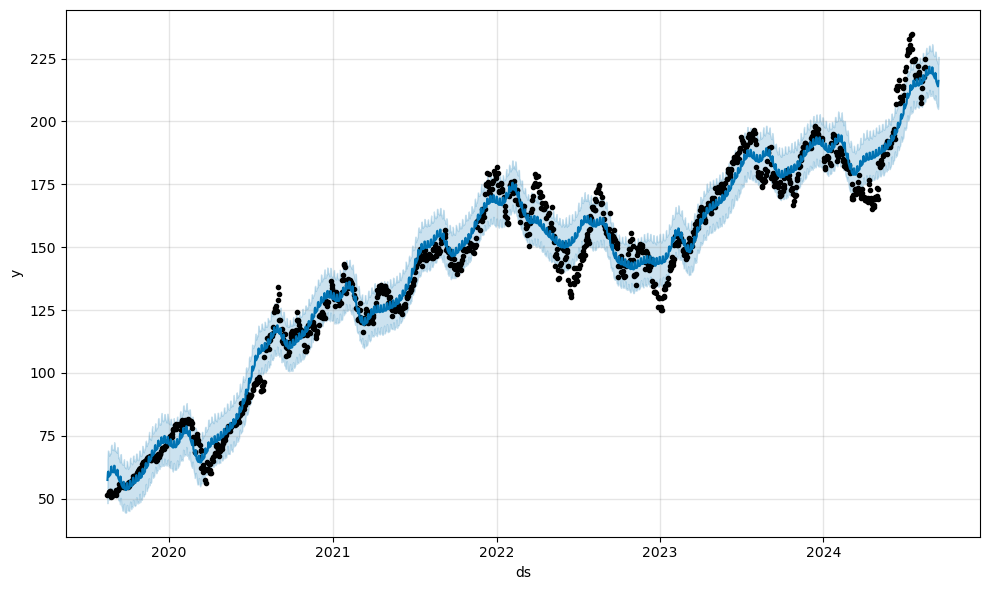

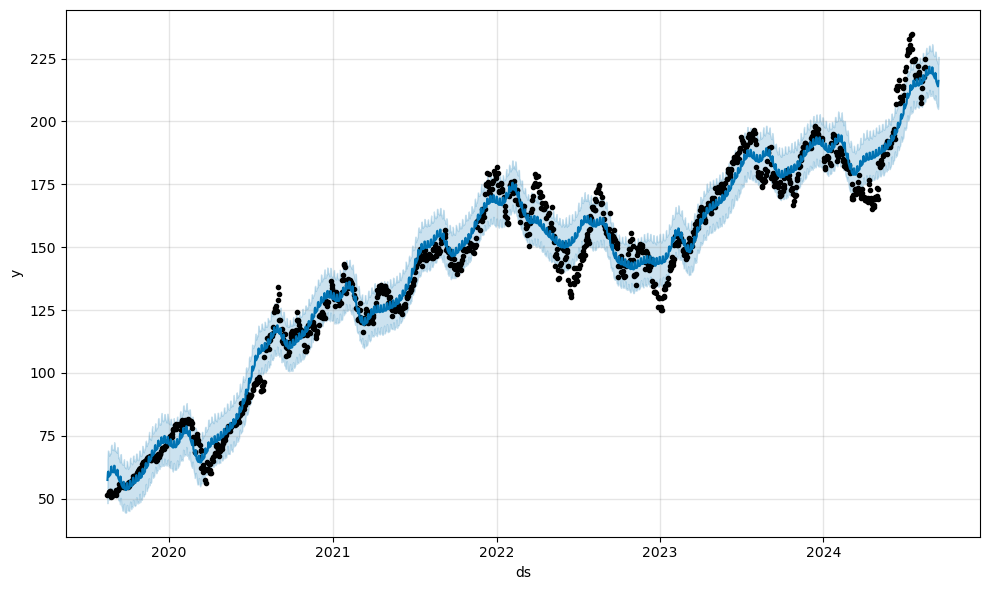

In [37]:
prophet_model.plot(forecast_prophet)

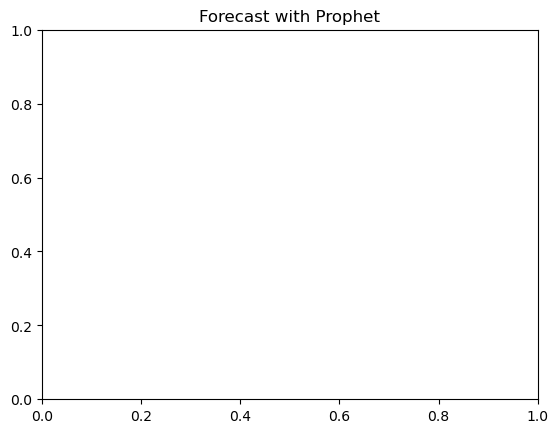

In [38]:
plt.title("Forecast with Prophet")
plt.show()

13:04:32 - cmdstanpy - INFO - Chain [1] start processing
13:04:33 - cmdstanpy - INFO - Chain [1] done processing


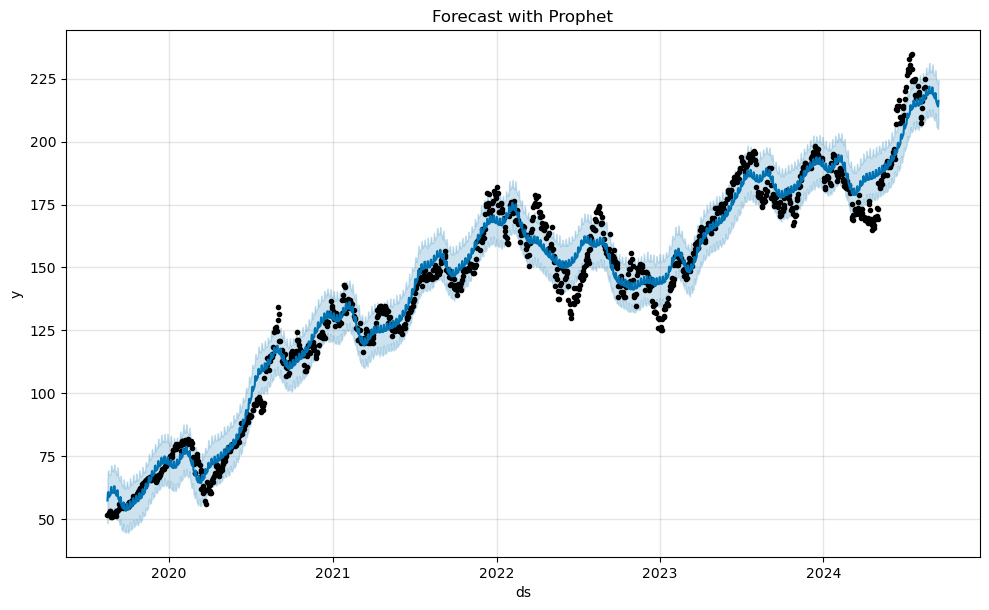

In [39]:
df_prophet = df.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})
prophet_model = Prophet()
prophet_model.fit(df_prophet)

future = prophet_model.make_future_dataframe(periods=30)
forecast_prophet = prophet_model.predict(future)

prophet_model.plot(forecast_prophet)
plt.title("Forecast with Prophet")
plt.show()

## 🧬 6. LSTM Forecasting

In [41]:
# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [42]:
scaler

MinMaxScaler()

In [43]:
scaled_data

array([[0.00524001],
       [       nan],
       [       nan],
       ...,
       [0.92642266],
       [0.92886617],
       [0.94515636]])

In [44]:
# Sequence creation
def create_dataset(data, time_step=60):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), 0])
        Y.append(data[i+time_step, 0])
    return np.array(X), np.array(Y)

X, y = create_dataset(scaled_data)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [45]:
X

array([[[0.00524001],
        [       nan],
        [       nan],
        ...,
        [       nan],
        [       nan],
        [0.04511022]],

       [[       nan],
        [       nan],
        [0.01046645],
        ...,
        [       nan],
        [0.04511022],
        [0.04436361]],

       [[       nan],
        [0.01046645],
        [0.01048002],
        ...,
        [0.04511022],
        [0.04436361],
        [0.04307395]],

       ...,

       [[0.88824934],
        [0.87874674],
        [       nan],
        ...,
        [0.89910946],
        [       nan],
        [       nan]],

       [[0.87874674],
        [       nan],
        [       nan],
        ...,
        [       nan],
        [       nan],
        [0.90611421]],

       [[       nan],
        [       nan],
        [0.90144435],
        ...,
        [       nan],
        [0.90611421],
        [0.92642266]]])

In [47]:
y

array([0.04436361, 0.04307395, 0.04430929, ..., 0.90611421, 0.92642266,
       0.92886617])

In [48]:
# LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(60,1)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=20, batch_size=32)

C:\Users\TECH-GENIUSES\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: nan
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: nan
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: nan
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: nan
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: nan
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: nan
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: nan
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: nan
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: nan
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: nan
Epoch 11/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: nan
Epoch 12/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: nan
Epoch 13/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: nan
Epoch 14/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: nan
Epoch 15/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: nan
Epoch 16/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/st

In [49]:
model

<Sequential name=sequential, built=True>

In [50]:
# Forecast
test_data = scaled_data[-60:]
X_test = test_data.reshape(1, 60, 1)
lstm_forecast = model.predict(X_test)
lstm_forecast = scaler.inverse_transform(lstm_forecast)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 896ms/step


In [51]:
test_data

array([[0.90144435],
       [0.88852078],
       [       nan],
       [0.8634882 ],
       [0.85159643],
       [       nan],
       [       nan],
       [0.85512594],
       [0.86017594],
       [0.88287355],
       [0.88748914],
       [0.86859247],
       [       nan],
       [       nan],
       [0.90187877],
       [0.9209926 ],
       [0.92794307],
       [       nan],
       [0.95395303],
       [       nan],
       [       nan],
       [0.96198958],
       [0.96665935],
       [0.99000863],
       [0.96063206],
       [0.97675926],
       [       nan],
       [       nan],
       [0.9977193 ],
       [1.        ],
       [0.96774543],
       [0.94222408],
       [0.94293001],
       [       nan],
       [       nan],
       [0.94102954],
       [0.94673104],
       [0.91159854],
       [0.90589704],
       [0.90844918],
       [       nan],
       [       nan],
       [0.90996958],
       [0.91301041],
       [0.930821  ],
       [0.91062117],
       [0.91876626],
       [     

In [52]:
X_test

array([[[0.90144435],
        [0.88852078],
        [       nan],
        [0.8634882 ],
        [0.85159643],
        [       nan],
        [       nan],
        [0.85512594],
        [0.86017594],
        [0.88287355],
        [0.88748914],
        [0.86859247],
        [       nan],
        [       nan],
        [0.90187877],
        [0.9209926 ],
        [0.92794307],
        [       nan],
        [0.95395303],
        [       nan],
        [       nan],
        [0.96198958],
        [0.96665935],
        [0.99000863],
        [0.96063206],
        [0.97675926],
        [       nan],
        [       nan],
        [0.9977193 ],
        [1.        ],
        [0.96774543],
        [0.94222408],
        [0.94293001],
        [       nan],
        [       nan],
        [0.94102954],
        [0.94673104],
        [0.91159854],
        [0.90589704],
        [0.90844918],
        [       nan],
        [       nan],
        [0.90996958],
        [0.91301041],
        [0.930821  ],
        [0

In [53]:
lstm_forecast

array([[nan]], dtype=float32)

## 🤝 7. Ensemble Prediction

In [56]:
ensemble = np.mean([
    forecast_arima.values[-1],
    forecast_sarima.values[-1],
    forecast_prophet['yhat'].values[-1],
    lstm_forecast[0][0]
])
print(f"Ensemble Forecast (Next Step): ₹{ensemble:.2f}")

Ensemble Forecast (Next Step): ₹nan


## 📐 8. Accuracy Evaluation

In [59]:
def evaluate(actual, predicted):
    # Align both Series to drop NaNs
    df_eval = pd.DataFrame({'actual': actual, 'predicted': predicted}).dropna()

    mse = mean_squared_error(df_eval['actual'], df_eval['predicted'])
    mae = mean_absolute_error(df_eval['actual'], df_eval['predicted'])
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")

# Example: ARIMA evaluation
evaluate(df['Close'][-30:], result_arima.predict(start=len(df)-30, end=len(df)-1))

Mean Squared Error: 14.10
Mean Absolute Error: 2.87
